# Library

In [ ]:
!pip install sastrawi
!pip install emoji
!pip install tweet-preprocessor

In [ ]:
# Impor untuk pengolahan teks
import re
import string
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import CountVectorizer

# Impor untuk analisis teks
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Impor untuk visualisasi
import seaborn as sn
import matplotlib.pyplot as plt

# Impor untuk pengolahan data
import os
import pandas as pd
import numpy as np

# Impor untuk analisis teks dan preprocessing
import emoji
from preprocessor.api import clean, tokenize, parse

# Unduh stopwords untuk bahasa Inggris
import nltk
nltk.download('stopwords')

# Unduh stopwords dan tokenizer untuk bahasa Indonesia
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Unduh komponen Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

# Unduh TweetTokenizer untuk tokenisasi tweet
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data


In [ ]:
# Memuat data
df = pd.read_csv('all_data_labeled.csv')
df.rename(columns={"full_text": "Tweets"}, inplace=True)
df = df[df.Label != 'Netral']
df

,Tweets,Label
0,Jadi kira-kira kapan TikTok Shop akan dibuka k...,Positif
1,KOH CUN UPDATE STORY SEPERTI INI. APAKAH TIKTO...,Positif
2,Sebelum Masuk Ke Step-step Pendaftaran TokTok ...,Negatif
3,Cerita Perjalanan Saya Di TikTok Shop Affiliat...,Positif
4,Turut berduka🙏🏻😭,Positif
...,...,...
5959,Wow! Produk UMKM Lokal Laris Manis saat Dijual...,Positif
5960,"pelaku bisnis umkm di Tiktok Shop aja bangga, ...",Positif
5961,Lagi rame nih.. Mengejutkan! Ini Mitos dan Fa...,Positif
5963,UMKM Bangga dengan Produk Lokal yang Dijual di...,Positif


## Preprocessing

In [ ]:
def clean_text(text):
    # Remove URL
    text = re.sub(r'http\S+', '', text)

    # Casefolding
    text = text.lower()

    # Remove Username
    pattern_regex = '/@([\w]+)/'
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    # Remove Symbol
    text = re.sub(r'[^\w]', ' ', text)
    text = re.sub('[0-9]+', '', text)
    text = re.sub('#[^\s]+', '', text)

    # Remove Whitespace
    text = text.replace('\n', ' ')

    # Remove Emoji
    text = emoji.demojize(text)
    text = text.replace(":", " ")
    text = ' '.join(text.split())

    text = text.replace('[^\w\s]','')
    return text

# Membersihkan data
def clean_data(df):
    df['Tweets'] = df['Tweets'].apply(lambda x: clean_text(x))
    df = df[df['Tweets'] != '']
    df.drop_duplicates(subset="Tweets", keep="first", inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

In [ ]:
# Membersihkan data
df = clean_data(df)
df

,Tweets,Label
0,jadi kira kira kapan tiktok shop akan dibuka k...,Positif
1,koh cun update story seperti ini apakah tiktok...,Positif
2,sebelum masuk ke step step pendaftaran toktok ...,Negatif
3,cerita perjalanan saya di tiktok shop affiliate,Positif
4,turut berduka,Positif
...,...,...
5565,ada wacana pemerintah akan menutup tiktok shop...,Positif
5566,pelaku bisnis umkm di tiktok shop aja bangga k...,Positif
5567,lagi rame nih mengejutkan ini mitos dan fakta ...,Positif
5568,umkm bangga dengan produk lokal yang dijual di...,Positif


## Feature Extraction

In [ ]:
# Import CountVectorizer for text vectorization
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Fitur extraction menggunakan CountVectorizer untuk unigram
stop_words = stopwords.words('indonesian')
CV = CountVectorizer(min_df=5, max_df=0.7, ngram_range = (1,1), stop_words = stop_words)

In [ ]:
X_unigram = CV.fit_transform(df.Tweets).toarray()
X_unigram = pd.DataFrame(X_unigram, columns = CV.get_feature_names_out())
X_unigram

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


,abang,abis,acc,ad,adakah,adaptasi,adil,adlh,admin,ads,...,york,you,your,youtube,yuk,yukk,zaman,zodiak,zulhas,zulkifli
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Sampling

### Base Data


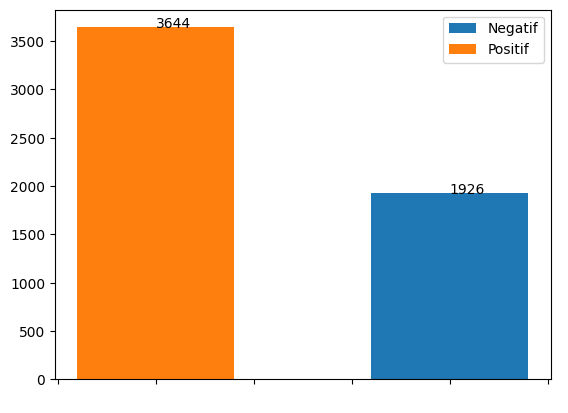

In [ ]:
cls, counts = np.unique(df.Label, return_counts=True)
plt.bar(4 , counts[0], label='Negatif'), plt.text(4, counts[0], counts[0])
plt.bar(2.5 , counts[1], label='Positif'), plt.text(2.5, counts[1], counts[1])
plt.xticks(color='w')
plt.legend()
plt.show()

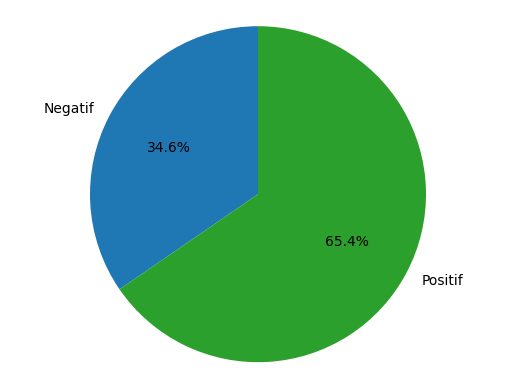

In [ ]:
# Import library yang diperlukan
import matplotlib.pyplot as plt

# Data
#labels = ['Negatif','Netral', 'Positif']
labels = ['Negatif', 'Positif']
sizes = counts

# Warna yang akan digunakan pada setiap bagian pie
#colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
colors = ['#1f77b4', '#2ca02c']

# Membuat pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Membuat plot menjadi bentuk lingkaran (pie)
plt.axis('equal')

# Menampilkan diagram pie
plt.show()


### Over Sampling Data

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, k_neighbors=100)
X_smote_unigram, y_smote_unigram = sm.fit_resample(X_unigram, df.Label)


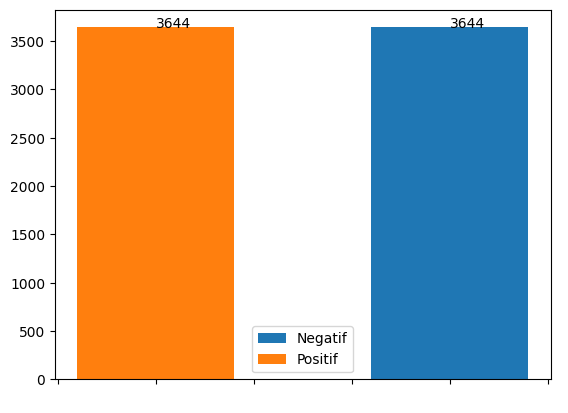

In [ ]:
cls, counts = np.unique(y_smote_unigram, return_counts=True)
plt.bar(4 , counts[0], label='Negatif'), plt.text(4, counts[0], counts[0])
plt.bar(2.5 , counts[1], label='Positif'), plt.text(2.5, counts[1], counts[1])
plt.xticks(color='w')
plt.legend()
plt.show()

### Under Sampling Data

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Instantiate RandomUnderSampler object
rus = RandomUnderSampler(random_state=42)
X_undersm_unigram, y_undersm_unigram = rus.fit_resample(X_unigram, df.Label)


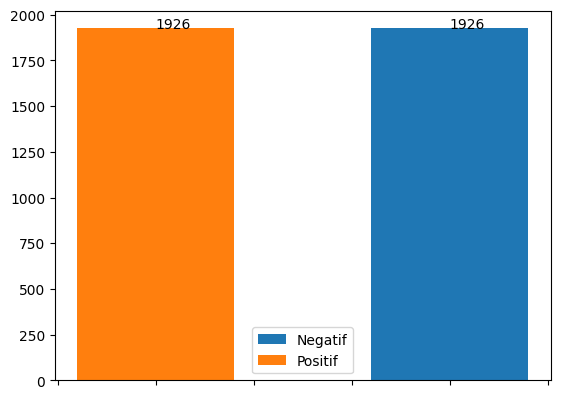

In [ ]:
cls, counts = np.unique(y_undersm_unigram, return_counts=True)
plt.bar(4 , counts[0], label='Negatif'), plt.text(4, counts[0], counts[0])
plt.bar(2.5 , counts[1], label='Positif'), plt.text(2.5, counts[1], counts[1])
plt.xticks(color='w')
plt.legend()
plt.show()

## Splitting Data

### Base Data

In [ ]:
# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X_unigram, df.Label, test_size=0.25, stratify=df.Label, random_state=42)

In [ ]:
X_train

,abang,abis,acc,ad,adakah,adaptasi,adil,adlh,admin,ads,...,york,you,your,youtube,yuk,yukk,zaman,zodiak,zulhas,zulkifli
1513,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1866,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
393,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test

,abang,abis,acc,ad,adakah,adaptasi,adil,adlh,admin,ads,...,york,you,your,youtube,yuk,yukk,zaman,zodiak,zulhas,zulkifli
1812,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2128,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1297,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Over Sampling Data

In [ ]:
# Bagi data menjadi set pelatihan dan pengujian
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote_unigram, y_smote_unigram, test_size=0.25, stratify=y_smote_unigram, random_state=42)

In [ ]:
X_train_smote

,abang,abis,acc,ad,adakah,adaptasi,adil,adlh,admin,ads,...,york,you,your,youtube,yuk,yukk,zaman,zodiak,zulhas,zulkifli
1759,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5641,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test_smote

,abang,abis,acc,ad,adakah,adaptasi,adil,adlh,admin,ads,...,york,you,your,youtube,yuk,yukk,zaman,zodiak,zulhas,zulkifli
1454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2897,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2705,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6257,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6269,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
319,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Under Sampling Data

In [ ]:
# Bagi data menjadi set pelatihan dan pengujian
X_train_undersm, X_test_undersm, y_train_undersm, y_test_undersm = train_test_split(X_undersm_unigram, y_undersm_unigram, test_size=0.25, stratify=y_undersm_unigram, random_state=42)

In [ ]:
X_train_undersm

,abang,abis,acc,ad,adakah,adaptasi,adil,adlh,admin,ads,...,york,you,your,youtube,yuk,yukk,zaman,zodiak,zulhas,zulkifli
2008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3626,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
829,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
810,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test_undersm

,abang,abis,acc,ad,adakah,adaptasi,adil,adlh,admin,ads,...,york,you,your,youtube,yuk,yukk,zaman,zodiak,zulhas,zulkifli
2455,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3301,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1332,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2942,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Modeling

## Random Forrest

### Base Data

In [ ]:
# Membuat model Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Random Forest Classification Report:
              precision    recall  f1-score   support

     Negatif   0.634529  0.587137  0.609914       482
     Positif   0.789863  0.821076  0.805167       911

    accuracy                       0.740129      1393
   macro avg   0.712196  0.704106  0.707540      1393
weighted avg   0.736115  0.740129  0.737606      1393



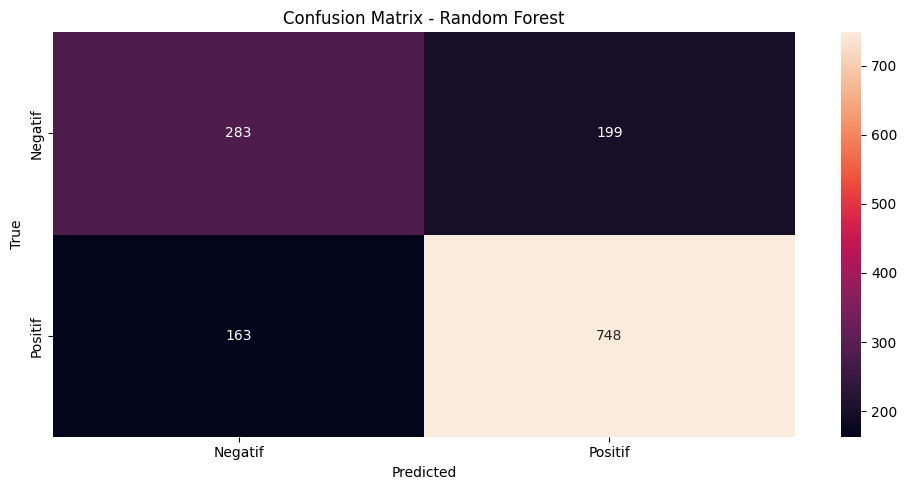

In [ ]:
# Melakukan prediksi model Random Forrest
predict_rf = random_forest.predict(X_test)

# Menampilkan hasil evaluasi model Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test, predict_rf, digits=6))

# Membuat visualisasi confusion matrix untuk model Random Forest
plt.figure(figsize=(10, 5))
sn.heatmap(confusion_matrix(y_test, predict_rf), xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'], annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

### Over Sampling Data

In [ ]:
# Membuat model Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

Random Forest Classification Report:
              precision    recall  f1-score   support

     Negatif   0.716981  0.834248  0.771182       911
     Positif   0.801837  0.670692  0.730424       911

    accuracy                       0.752470      1822
   macro avg   0.759409  0.752470  0.750803      1822
weighted avg   0.759409  0.752470  0.750803      1822



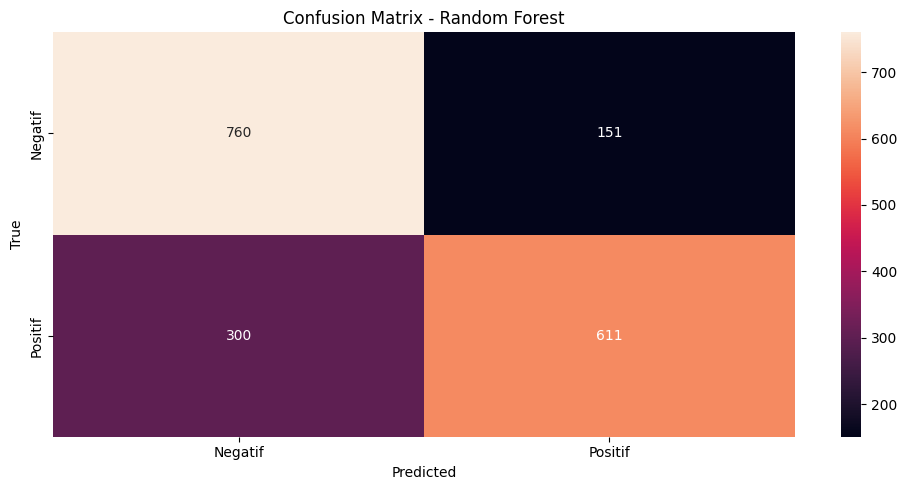

In [ ]:
# Melakukan prediksi model Random Forrest
predict_rf = random_forest.predict(X_test_smote)

# Menampilkan hasil evaluasi model Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test_smote, predict_rf, digits=6))

# Membuat visualisasi confusion matrix untuk model Random Forest
plt.figure(figsize=(10, 5))
sn.heatmap(confusion_matrix(y_test_smote, predict_rf), xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'], annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

### Under Sampling Data

In [ ]:
# Membuat model Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_undersm, y_train_undersm)

RandomForestClassifier(random_state=42)

Random Forest Classification Report:
              precision    recall  f1-score   support

     Negatif   0.711423  0.736515  0.723751       482
     Positif   0.726293  0.700624  0.713228       481

    accuracy                       0.718588       963
   macro avg   0.718858  0.718569  0.718489       963
weighted avg   0.718850  0.718588  0.718495       963



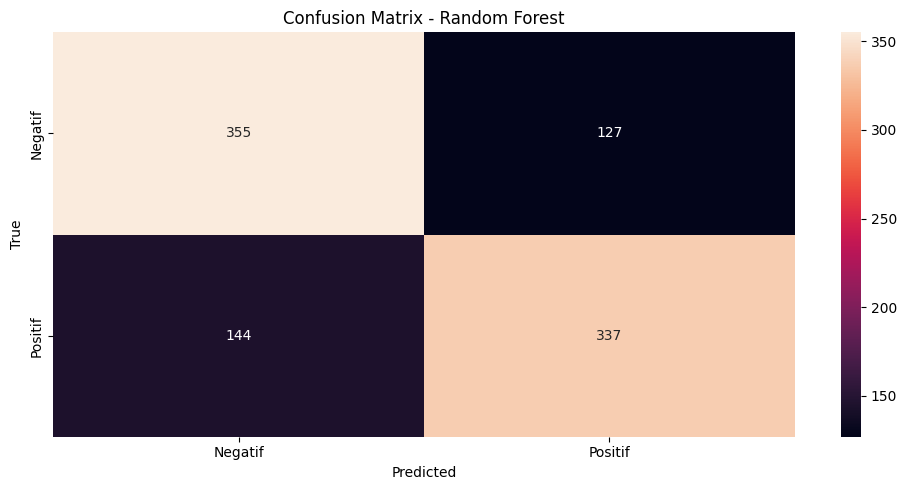

In [ ]:
# Melakukan prediksi model Random Forrest
predict_rf = random_forest.predict(X_test_undersm)

# Menampilkan hasil evaluasi model Random Forest
print("Random Forest Classification Report:")
print(classification_report(y_test_undersm, predict_rf, digits=6))

# Membuat visualisasi confusion matrix untuk model Random Forest
plt.figure(figsize=(10, 5))
sn.heatmap(confusion_matrix(y_test_undersm, predict_rf), xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'], annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

## Decision Tree

### Base Data

In [ ]:
# Membuat model Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Decision Tree Classification Report:
              precision    recall  f1-score   support

     Negatif   0.547244  0.576763  0.561616       482
     Positif   0.769492  0.747530  0.758352       911

    accuracy                       0.688442      1393
   macro avg   0.658368  0.662147  0.659984      1393
weighted avg   0.692590  0.688442  0.690278      1393



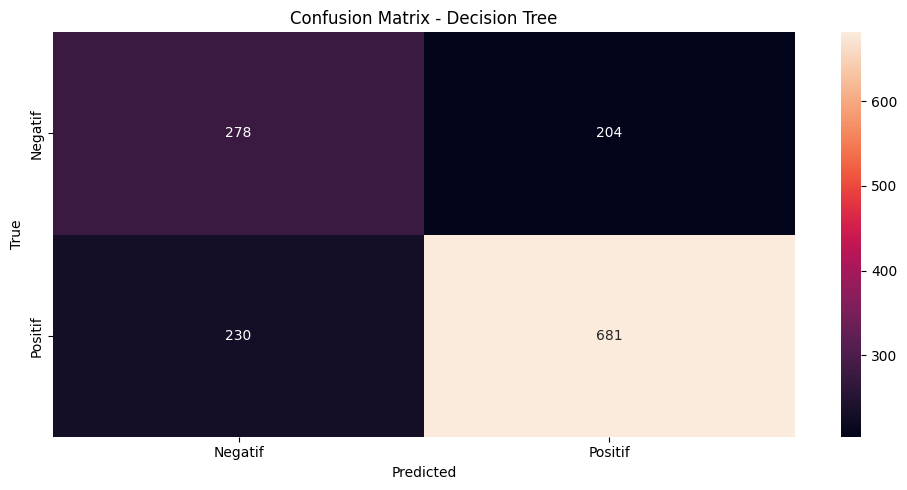

In [ ]:
# Melakukan prediksi model Decision Tree
predict_dt = decision_tree.predict(X_test)

# Menampilkan hasil evaluasi model Decision Tree
print("Decision Tree Classification Report:")
print(classification_report(y_test, predict_dt, digits=6))

# Membuat visualisasi confusion matrix untuk model Decision Tree
plt.figure(figsize=(10, 5))
sn.heatmap(confusion_matrix(y_test, predict_dt), xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'], annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree')
plt.tight_layout()
plt.show()

### Over Sampling Data

In [ ]:
# Membuat model Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=42)

Decision Tree Classification Report:
              precision    recall  f1-score   support

     Negatif   0.674931  0.806806  0.735000       911
     Positif   0.759891  0.611416  0.677616       911

    accuracy                       0.709111      1822
   macro avg   0.717411  0.709111  0.706308      1822
weighted avg   0.717411  0.709111  0.706308      1822



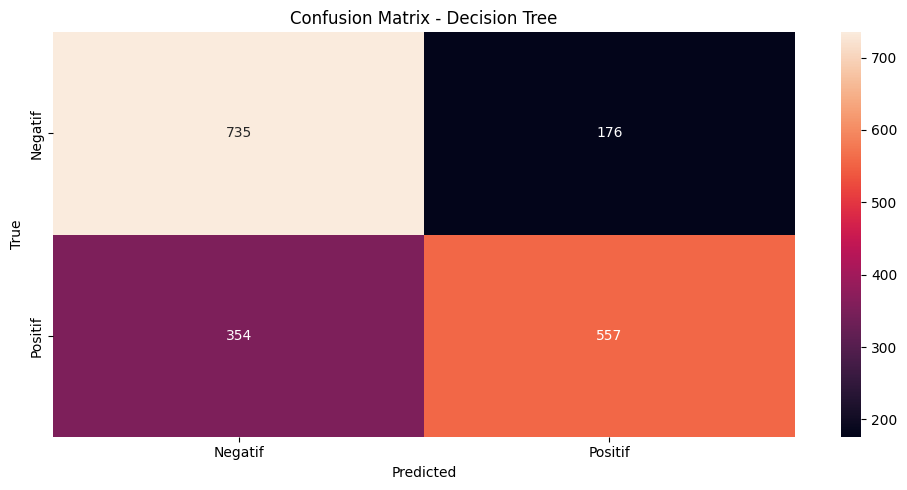

In [ ]:
# Melakukan prediksi model Decision Tree
predict_dt = decision_tree.predict(X_test_smote)

# Menampilkan hasil evaluasi model Decision Tree
print("Decision Tree Classification Report:")
print(classification_report(y_test_smote, predict_dt, digits=6))

# Membuat visualisasi confusion matrix untuk model Decision Tree
plt.figure(figsize=(10, 5))
sn.heatmap(confusion_matrix(y_test_smote, predict_dt), xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'], annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree')
plt.tight_layout()
plt.show()

### Under Sampling Data

In [ ]:
# Membuat model Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_undersm, y_train_undersm)

DecisionTreeClassifier(random_state=42)

Decision Tree Classification Report:
              precision    recall  f1-score   support

     Negatif   0.665236  0.643154  0.654008       482
     Positif   0.653924  0.675676  0.664622       481

    accuracy                       0.659398       963
   macro avg   0.659580  0.659415  0.659315       963
weighted avg   0.659586  0.659398  0.659310       963



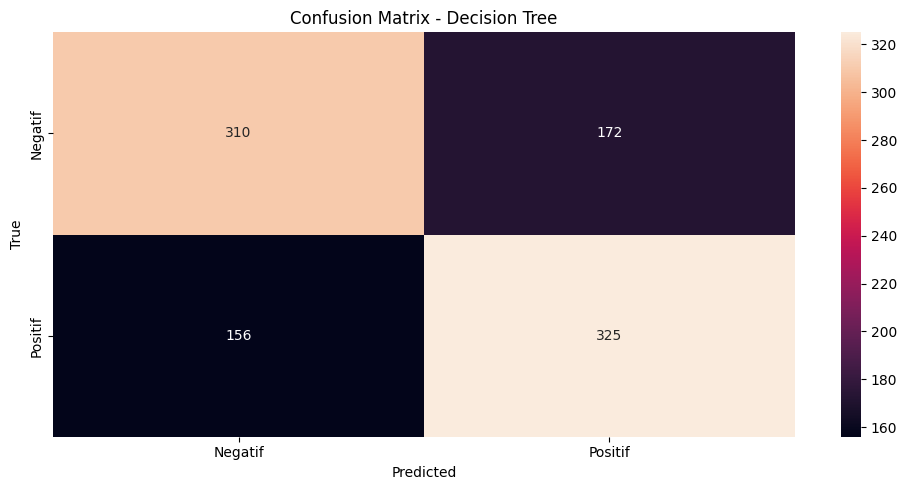

In [ ]:
# Melakukan prediksi model Decision Tree
predict_dt = decision_tree.predict(X_test_undersm)

# Menampilkan hasil evaluasi model Decision Tree
print("Decision Tree Classification Report:")
print(classification_report(y_test_undersm, predict_dt, digits=6))

# Membuat visualisasi confusion matrix untuk model Decision Tree
plt.figure(figsize=(10, 5))
sn.heatmap(confusion_matrix(y_test_undersm, predict_dt), xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'], annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree')
plt.tight_layout()
plt.show()